In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [4]:
train=pd.read_csv("C:/Users/panda/OneDrive/Desktop/loan train.csv")
test=pd.read_csv("C:/Users/panda/OneDrive/Desktop/loan test.csv")

# eda & data preprocessing 

In [5]:
train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [10]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [12]:
data = [train,test]
for dataset in data:
    #Filter categorical variables
    categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    # Exclude ID cols and source:
    categorical_columns = [x for x in categorical_columns if x not in ['Loan_ID' ]]
    #Print frequency of categories
    
for col in categorical_columns:
    print ('\nFrequency of Categories for variable %s'%col)
    print (train[col].value_counts())


Frequency of Categories for variable Gender
Male      489
Female    112
Name: Gender, dtype: int64

Frequency of Categories for variable Married
Yes    398
No     213
Name: Married, dtype: int64

Frequency of Categories for variable Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Frequency of Categories for variable Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Frequency of Categories for variable Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64

Frequency of Categories for variable Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

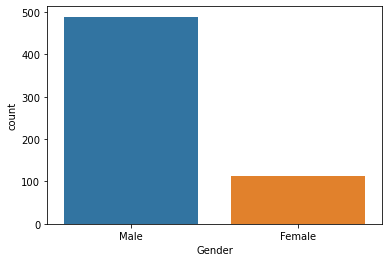

In [18]:
sb.countplot(train['Gender'])

# train.head()

In [22]:
pd.crosstab(train.Gender, train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


# the male  are the large number of the applicant as compaired to the  female applicant 

# filling the nan values of gender and converting categorical  variables 

In [23]:
train.Gender = train.Gender.fillna(train.Gender.mode())
test.Gender = test.Gender.fillna(test.Gender.mode())

sex = pd.get_dummies(train['Gender'] , drop_first = True )
train.drop(['Gender'], axis = 1 , inplace =True)
train = pd.concat([train , sex ] , axis = 1)

sex = pd.get_dummies(test['Gender'] , drop_first = True )
test.drop(['Gender'], axis = 1 , inplace =True)
test = pd.concat([test , sex ] , axis = 1)

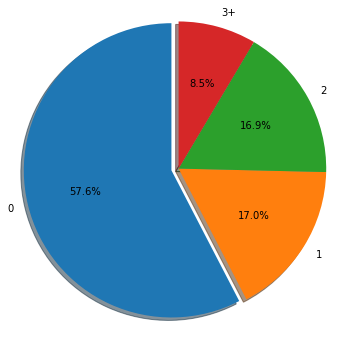

In [24]:
plt.figure(figsize=(6,6))
labels = ['0' , '1', '2' , '3+']
explode = (0.05, 0, 0, 0)
size = [345 , 102 , 101 , 51]

plt.pie(size, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [25]:
train.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [26]:
pd.crosstab(train.Dependents,train.Loan_Status,margins=True)

Loan_Status,N,Y,All
Dependents,,,
0,107,238,345
1,36,66,102
2,25,76,101
3+,18,33,51
All,186,413,599


In [27]:
train.Dependents=train.Dependents.fillna("0")
test.Dependents=test.Dependents.fillna("0")

rpl={'0':'0','1':'1','2':'2','3+':'3'}

train.Dependents = train.Dependents.replace(rpl).astype(int)
test.Dependents = test.Dependents.replace(rpl).astype(int)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

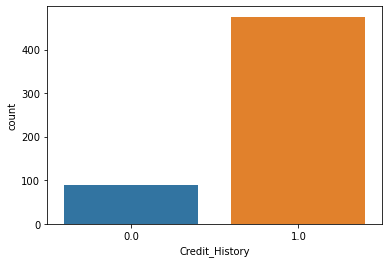

In [28]:
sb.countplot(train['Credit_History'])

In [29]:
pd.crosstab(train.Credit_History , train.Loan_Status, margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [30]:
train.Credit_History = train.Credit_History.fillna(train.Credit_History.mode()[0])
test.Credit_History  = test.Credit_History.fillna(test.Credit_History.mode()[0])

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

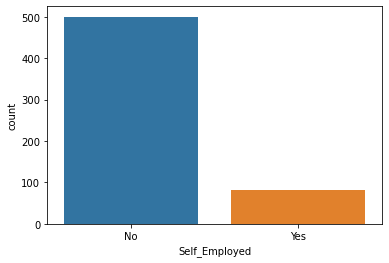

In [31]:
sb.countplot(train['Self_Employed'])

In [32]:
pd.crosstab(train.Self_Employed , train.Loan_Status,margins = True)

Loan_Status,N,Y,All
Self_Employed,,,
No,157,343,500
Yes,26,56,82
All,183,399,582


In [33]:
train.Self_Employed = train.Self_Employed.fillna(train.Self_Employed.mode())
test.Self_Employed = test.Self_Employed.fillna(test.Self_Employed.mode())

self_Employed = pd.get_dummies(train['Self_Employed'] ,prefix = 'employed' ,drop_first = True )
train.drop(['Self_Employed'], axis = 1 , inplace =True)
train = pd.concat([train , self_Employed ] , axis = 1)

self_Employed = pd.get_dummies(test['Self_Employed'] , prefix = 'employed' ,drop_first = True )
test.drop(['Self_Employed'], axis = 1 , inplace =True)
test = pd.concat([test , self_Employed ] , axis = 1)

<AxesSubplot:xlabel='Married', ylabel='count'>

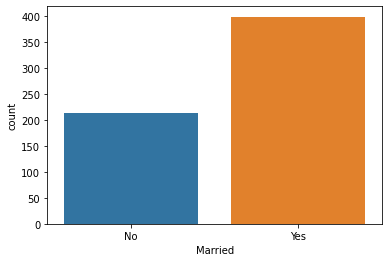

In [34]:
sb.countplot(train.Married)

In [35]:
pd.crosstab(train.Married,train.Loan_Status,margins=True)

Loan_Status,N,Y,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


In [36]:
train.Married = train.Married.fillna(train.Married.mode())
test.Married = test.Married.fillna(test.Married.mode())

married = pd.get_dummies(train['Married'] , prefix = 'married',drop_first = True )
train.drop(['Married'], axis = 1 , inplace =True)
train = pd.concat([train , married ] , axis = 1)

married = pd.get_dummies(test['Married'] , prefix = 'married', drop_first = True )
test.drop(['Married'], axis = 1 , inplace =True)
test = pd.concat([test , married ] , axis = 1)

In [37]:
 train.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)
test.drop(['Loan_Amount_Term'], axis = 1 , inplace =True)

train.LoanAmount = train.LoanAmount.fillna(train.LoanAmount.mean()).astype(int)
test.LoanAmount = test.LoanAmount.fillna(test.LoanAmount.mean()).astype(int)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

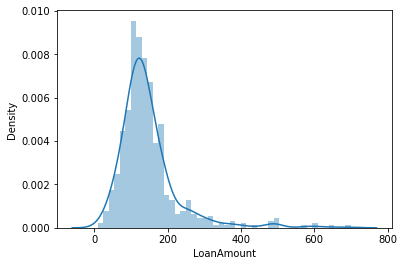

In [38]:
sb.distplot(train['LoanAmount'])

<AxesSubplot:xlabel='Education', ylabel='count'>

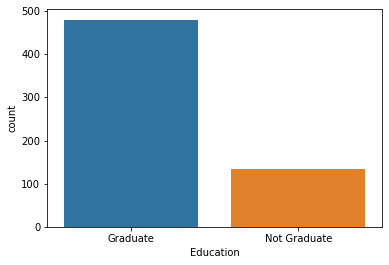

In [39]:
sb.countplot(train.Education)

In [40]:
train['Education'] = train['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)
test['Education'] = test['Education'].map( {'Graduate': 0, 'Not Graduate': 1} ).astype(int)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

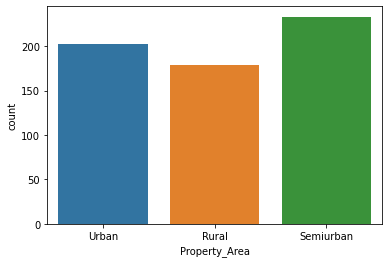

In [41]:
sb.countplot(train.Property_Area)

In [42]:
train['Property_Area'] = train['Property_Area'].map( {'Urban': 0, 'Semiurban': 1 ,'Rural': 2  } ).astype(int)

test.Property_Area = test.Property_Area.fillna(test.Property_Area.mode())
test['Property_Area'] = test['Property_Area'].map( {'Urban': 0, 'Semiurban': 1 ,'Rural': 2  } ).astype(int)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

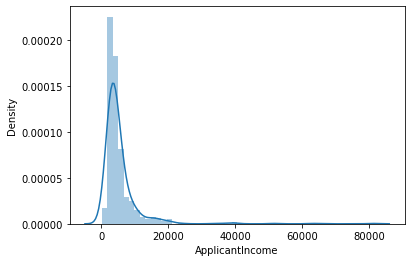

In [44]:
sb.distplot(train['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

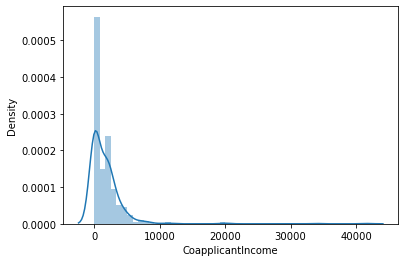

In [45]:
sb.distplot(train['CoapplicantIncome'])

# the target variable in number format 

In [46]:
train['Loan_status']=train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

# droping the id column

In [47]:
train.drop(['Loan_ID'],axis=1,inplace= True)

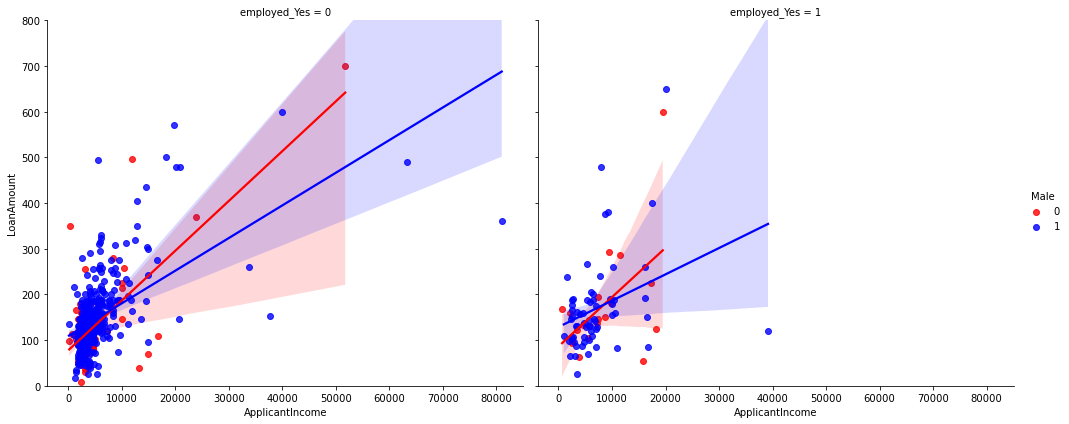

In [49]:
g = sb.lmplot(x='ApplicantIncome',y='LoanAmount',data= train , col='employed_Yes', hue='Male',
          palette= ["Red" , "Blue","Yellow"] ,aspect=1.2,size=6)
g.set(ylim=(0, 800))

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

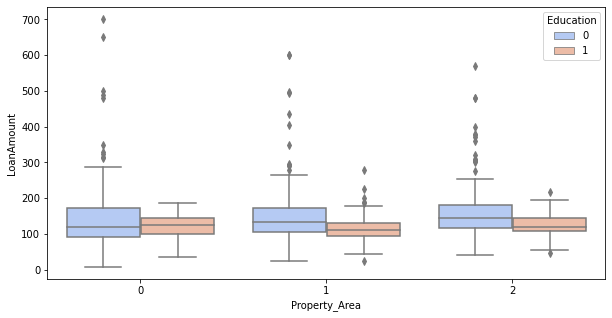

In [51]:
plt.figure(figsize=(10,5))
sb.boxplot(x="Property_Area", y="LoanAmount", hue="Education",data=train, palette="coolwarm")

In [52]:
train.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History'>

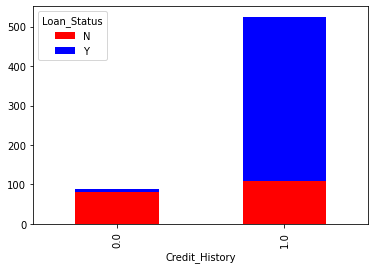

In [53]:
lc = pd.crosstab(train['Credit_History'], train['Loan_Status'])
lc.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

<AxesSubplot:>

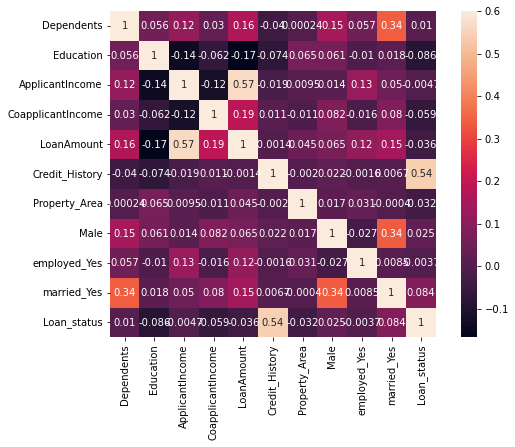

In [55]:
plt.figure(figsize=(9,6))
sb.heatmap(train.drop('Loan_Status',axis=1).corr(), vmax=0.6, square=True, annot=True)

In [56]:
X = train.drop('Loan_Status' , axis = 1 )
y = train['Loan_Status']

X_train ,X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state =102)

# logestic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train , y_train)
pred_l = logmodel.predict(X_test)
acc_l = accuracy_score(y_test , pred_l)*100
acc_l

96.75675675675676

# Random forest 

In [59]:
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, y_train)
pred_rf = random_forest.predict(X_test)
acc_rf = accuracy_score(y_test , pred_rf)*100
acc_rf

100.0

# K-Nearest Neighbors

In [60]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test , pred_knn)*100
acc_knn

61.08108108108108

# Naive Bayes

In [61]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
pred_gb = gaussian.predict(X_test)
acc_gb = accuracy_score(y_test , pred_gb)*100
acc_gb

99.45945945945947

# SVM

In [62]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)
acc_svm = accuracy_score(y_test , pred_svm)*100
acc_svm

70.27027027027027

# Gradient Boosting Classifier

In [63]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
pred_gbc = gbk.predict(X_test)
acc_gbc = accuracy_score(y_test , pred_gbc)*100
acc_gbc

100.0

In [64]:
## Arranging the Accuracy results
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forrest','K- Nearest Neighbour' ,
             'Naive Bayes' , 'SVM','Gradient Boosting Classifier'],
    'Score': [acc_l , acc_rf , acc_knn , acc_gb ,acc_svm ,acc_gbc ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forrest,100.000000
5,Gradient Boosting Classifier,100.000000
3,Naive Bayes,99.459459
0,Logistic Regression,96.756757
4,SVM,70.270270
2,K- Nearest Neighbour,61.081081


In [66]:
importances = pd.DataFrame({'Features':X_train.columns,'Importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Features')
importances.head(11) 

,Importance
Features,
Loan_status,0.794
Credit_History,0.111
LoanAmount,0.028
ApplicantIncome,0.024
CoapplicantIncome,0.018
Property_Area,0.007
Dependents,0.006
Education,0.004
Male,0.003


<AxesSubplot:xlabel='Features'>

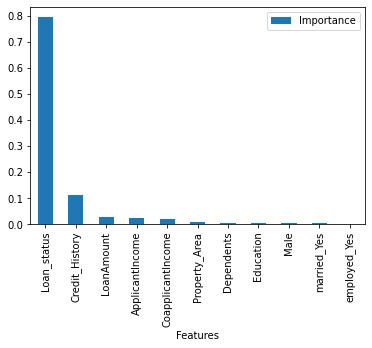

In [67]:
importances.plot.bar()

In [72]:
df_test = test.drop(['Loan_ID'], axis = 1)

In [73]:
df_test.head()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Male,employed_Yes,married_Yes
0,0,0,5720,0,110,1.0,0,1,0,1
1,1,0,3076,1500,126,1.0,0,1,0,1
2,2,0,5000,1800,208,1.0,0,1,0,1
3,2,0,2340,2546,100,1.0,0,1,0,1
4,0,1,3276,0,78,1.0,0,1,0,0


In [74]:
p_log = logmodel.predict(df_test)

ValueError: X has 10 features per sample; expecting 11